# Complex Dynamics of a Three Species Ecosystem

- Author: Ramsey (Rayla) Phuc
  - Alias: Rayla Kurosaki
  - GitHub: https://github.com/rkp1503
- Co-author: Ephraim Agyingi

```
pip install matplotlib, numpy, scipy, sympy
```

```
python code_python/main.py
```

In [1]:
#-----------------------------------------------------------------------------
# This block of code imports relevant libraries that are needed to run this 
# notebook.
#-----------------------------------------------------------------------------
import sympy as sym

from utils import equilibria_existance as eq_exist
from utils import compute_data, generate_figures, utils

sym.init_printing()

In [2]:
#-----------------------------------------------------------------------------
# This block of code initializes all mathematical variables and parameters 
# mentioned in the paper as well as initializing some parameters.
#-----------------------------------------------------------------------------
x, X, y, Y, z, Z, t = sym.symbols("x, X, y, Y, z, Z, t")

r_yx, r_zx, p = sym.symbols("r_yx, r_zx, p")
phi_xy, phi_yx, phi_xz = sym.symbols("phi_xy, phi_yx, phi_xz")
u_1, u_2, u_3, u_4 = sym.symbols("u_1, u_2, u_3, u_4")

filename: str = ""
show_equilibria: bool = False
show_stability: bool = False

In [3]:
#-----------------------------------------------------------------------------
# This block of code contains parameters that the user can manipulate.
#-----------------------------------------------------------------------------
# Initializing variable values
vars_dict = {
    # Density of species X
    x: 0.7,
    # Density of species Y
    y: 0.4,
    # Density of species Z
    z: 0.2,
}
# Initializing graph labels and colors
labels_colors_dict = {
    x: ["X", "Black"],
    y: ["Y", "Red"],
    z: ["Z", "Blue"],
}
# Initializing parameter values
params_dict = {
    # Ratio of intrinsic growth rate of species Y to species X
    r_yx: 0.5,
    # Ratio of intrinsic growth rate of species Z to species X
    r_zx: 0.5,
    # Refuge rate of species Y
    p: 0.6,
    # Scaled interspecies mutualism coefficient of species Y on species X
    phi_xy: 0.6,
    # Scaled interspecies competition coefficient of species X on species Y
    phi_yx: 0.15,
    # Scaled commensal coefficient of species Z on species X
    phi_xz: 0.4,
    # Scaled attack rate of species Z on species Y
    u_1: 0.6,
    # Scaled half saturation constant for Holling type II function
    u_2: 0.08,
    # Scaled conservation rate of species Y
    u_3: 0.5,
    # Scaled death rate of species Z
    u_4: 0.5,
}
# Creating a dictionary for a second set of parameter values
params_vals_2 = [0.7, 0.15, 0.4, 0.05, 0.5, 0.04, 0.7, 0.2, 0.5,
                    0.32]
params_dict_2 = dict(zip(params_dict.keys(), params_vals_2))
# Number of days to model.
t_max = 1_000
t_max_b = 10_000

## Proposed Model:
$$
\begin{align*}
	\frac{\textrm{d}x}{\textrm{d}t} &= x\left(1-x+\varphi_{xy}y^2\right)+\varphi_{xz}xz\\
	\frac{\textrm{d}y}{\textrm{d}t} &= r_{yx}y\left(1-y+\varphi_{yz}x^2\right)-\frac{u_1\left(1-p\right)yz}{u_2+\left(1-p\right)y}\\
	\frac{\textrm{d}z}{\textrm{d}t} &= r_{zx}z\left(1-z\right)+z\left(\frac{u_3\left(1-p\right)y}{u_2+\left(1-p\right)y}-u_4\right)
\end{align*}
$$

In [4]:
def model(variables, t, *parameters):
    x, y, z = variables
    r_yx, r_zx, p, phi_xy, phi_yx, phi_xz, u_1, u_2, u_3, u_4 = parameters[0] if len(parameters) == 1 else parameters
    dx = x*(1-x+phi_xy*y**2)-phi_xz*x*z
    dy = r_yx*y*(1-y+phi_yx*x**2)-((u_1*(1-p)*y*z)/(u_2+(1-p)*y))
    dz = r_zx*z*(1-z)+z*(((u_3*(1-p)*y)/(u_2+(1-p)*y))-u_4)
    return [dx, dy, dz]

## The existance of equilibria

In [5]:
equilibria = []

### The trivial equilibrium

In [6]:
if show_equilibria:
    E_0 = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [0, 0, 0])
    if E_0 is None:
        print("The trivial equilibrium does not exist!")
        pass
    else:
        display(tuple(E_0.values()))
        equilibria.append(E_0)
        pass
    pass

### The $x$-axial equilibrium

In [7]:
if show_equilibria:
    E_x = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [x, 0, 0])
    if E_x is None:
        print("The x-axial equilibrium does not exist!")
        pass
    else:
        display(tuple(E_x.values()))
        equilibria.append(E_x)
        pass
    pass

### The $y$-axial equilibrium

In [8]:
if show_equilibria:
    E_y = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [0, y, 0])
    if E_y is not None:
        display(tuple(E_y.values()))
        equilibria.append(E_y)
        pass
    else:
        print("The y-axial equilibrium does not exist!")
        pass
    pass

### The $z$-axial equilibrium

In [9]:
if show_equilibria:
    E_z = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [0, 0, z])
    if E_z is not None:
        display(tuple(E_z.values()))
        equilibria.append(E_z)
        pass
    else:
        print("The z-axial equilibrium does not exist!")
        pass
    pass

### The $xy$-boundary equilibrium

In [10]:
if show_equilibria:
    E_xy = eq_exist.xy_boundary(vars_dict, params_dict, [x, y, 0])
    if E_xy is not None:
        display(tuple(E_xy.values()))
        equilibria.append(E_xy)
        pass
    else:
        print("The xy-boundary equilibrium does not exist!")
        pass
    pass

### The $xz$-boundary equilibrium

In [11]:
if show_equilibria:
    E_xz = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [x, 0, z])
    if E_xz is not None:
        display(tuple(E_xz.values()))
        equilibria.append(E_xz)
        pass
    else:
        print("The xz-boundary equilibrium does not exist!")
        pass
    pass

### The $yz$-boundary equilibrium

In [12]:
if show_equilibria:
    E_yz = eq_exist.yz_boundary(vars_dict, params_dict, [0, y, z])
    if E_yz is not None:
        display(tuple(E_yz.values()))
        equilibria.append(E_yz)
        pass
    else:
        print("The yz-boundary equilibrium does not exist!")
        pass
    pass

### The interior equilibrium

In [13]:
if show_equilibria:
    E_xyz = eq_exist.interior(vars_dict, params_dict, [x, y, z])
    if E_xyz is not None:
        display(tuple(E_xyz.values()))
        equilibria.append(E_xyz)
        pass
    else:
        print("The interior equilibrium does not exist!")
        pass
    pass

### Displaying equilibria

In [14]:
if show_equilibria:
    for equilibrium in equilibria:
        display(tuple(equilibrium.values()))
        pass
    pass

## Stability analysis of Equilibria

\begin{equation*}
    \textbf{J}\left(E_i\right)=\textbf{J}\left(x_i^*,\ y_i^*,\ z_i^*\right)=\begin{bmatrix}
        j_{11} & j_{12} & j_{13}\\
        j_{21} & j_{22} & j_{23}\\
        0 & j_{32} & j_{33}
    \end{bmatrix}
\end{equation*}

where

\begin{align*}
    j_{11} &= 1-2x_i^*+\gamma_{12}\left(y_i^*\right)^2-\gamma_{13}z_i^*\\
    j_{12} &= 2\gamma_{12}x_i^*y_i^*\\
    j_{13} &= -\gamma_{13}x_i^*\\
    j_{21} &= 2\gamma_{21}r_1x_i^*y_i^*\\
    j_{22} &= r_1\left(1-2y_i^*+\gamma_{21}\left(x_i^*\right)^2\right)-\frac{v_1\left(1-p\right)z_i^*}{\left(v_1+\left(1-p\right)y_i^*\right)^2}\\
    j_{23} &= -\frac{\left(1-p\right)y_i^*}{v_1+\left(1-p\right)y_i^*}\\
    j_{32} &= \frac{v_1v_3\left(1-p\right)z_i^*}{\left(v_1+\left(1-p\right)y_i^*\right)^2}\\
    j_{33} &= r_2\left(1-2\gamma_{31}z_i^*\right)+\frac{v_3\left(1-p\right)y_i^*}{v_1+\left(1-p\right)y_i^*}-v_2
\end{align*}

### The trivial equilibrium

In [15]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_0)
    utils.stability_analysis(jacobian, jacobian_s)
    pass

### The $x$-axial equilibrium

In [16]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_x)
    utils.stability_analysis(jacobian, jacobian_s)
    pass

### The $y$-axial equilibrium

In [17]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_y)
    utils.stability_analysis(jacobian, jacobian_s, compact=True)
    pass

### The $z$-axial equilibrium

In [18]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_z)
    utils.stability_analysis(jacobian, jacobian_s, compact=True)
    pass

### The $xy$-boundary equilibrium

In [19]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_xy)
    utils.stability_analysis(jacobian, jacobian_s, compact=True, method="RHC")
    pass

### The $xz$-boundary equilibrium

In [20]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_xz)
    utils.stability_analysis(jacobian, jacobian_s, compact=True)
    pass

### The $yz$-boundary equilibrium

In [21]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_yz)
    utils.stability_analysis(jacobian, jacobian_s, compact=True, method="RHC")
    pass

### The interior equilibrium

In [22]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_xyz)
    utils.stability_analysis(jacobian, jacobian_s, compact=True, method="RHC")
    pass

## Numerical Simulations of Non-Interior Equilibria
### The $z$-axial equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


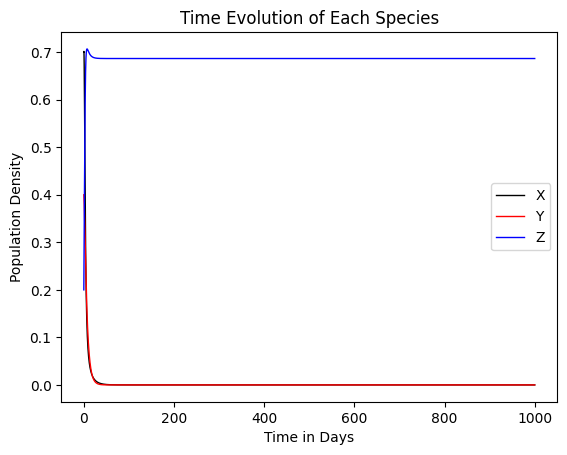

In [23]:
params_symb = params_dict.keys()

param_values = [0.007, 1.136, 0.874, 0.318, 0.416, 1.59, 1.655, 0.791, 0.994,
                0.356]
params_dict_temp = dict(zip(params_symb, param_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

title = "Time Evolution of Each Species"
xaxis = "Time in Days"
yaxis = "Population Density"

filename = "equilibrium-axial-z"
generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

### The $xy$-boundary equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


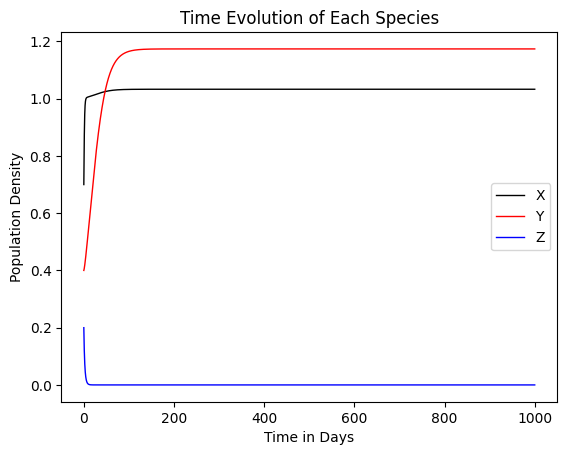

In [24]:
param_values = [0.049, 0.467, 0.645, 0.024, 0.163, 0.031, 0.31, 0.978, 0.9,
                1.004]
params_dict_temp = dict(zip(params_symb, param_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

filename = "equilibrium-boundary-xy"
generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

### The $xz$-boundary equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


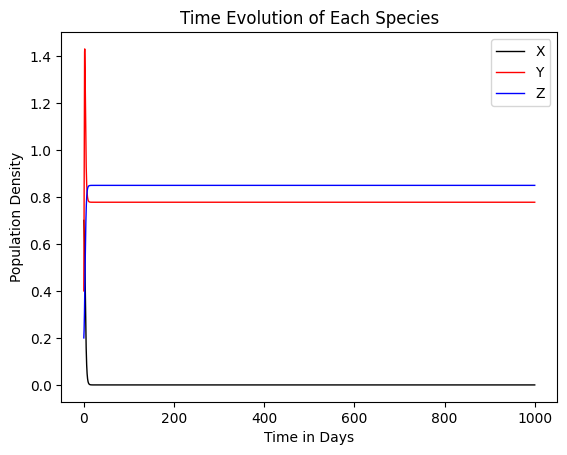

In [25]:
param_values = [1.219, 0.452, 0.589, 0.047, 1.587, 1.908, 1.658, 1.812, 1.473, 
                0.289]
params_dict_temp = dict(zip(params_symb, param_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

filename = "equilibrium-boundary-xz"
generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

### The $yz$-boundary equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


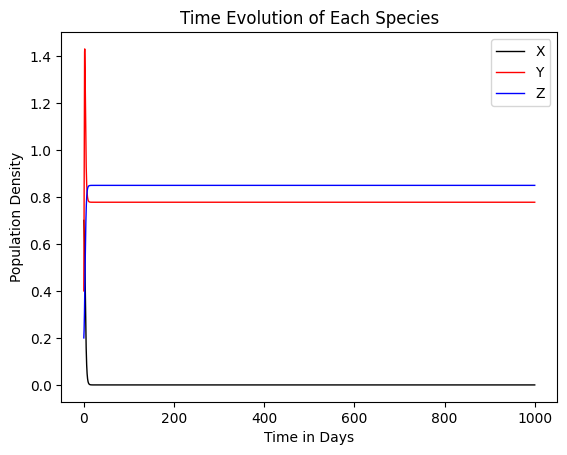

In [26]:
param_values = [1.219, 0.452, 0.589, 0.047, 1.587, 1.908, 1.658, 1.812, 1.473, 
                0.289]
params_dict_temp = dict(zip(params_symb, param_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

filename = "equilibrium-boundary-yz"
generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

### The interior equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


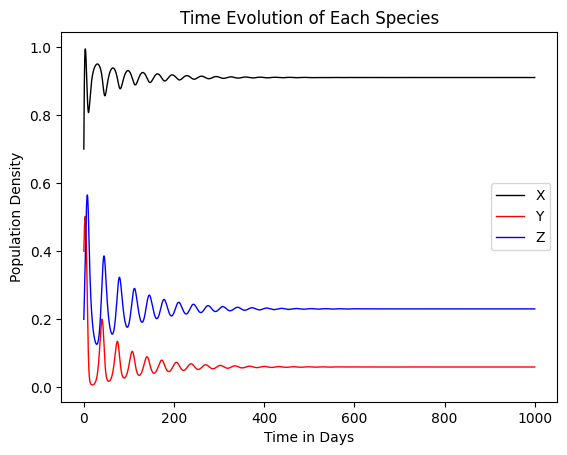

In [27]:
ts, sol = compute_data.solve_model(model, vars_dict, params_dict, t_max)

filename = "equilibrium-interior-time-evolution"
generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


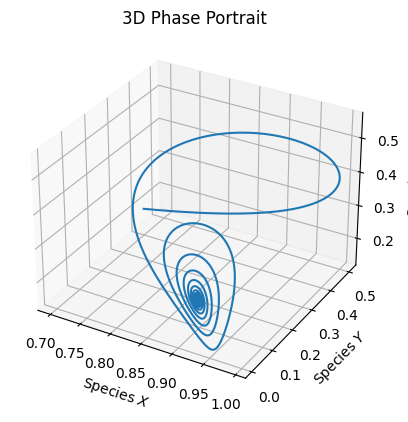

In [28]:
sol_x, sol_y, sol_z = [sol[:, i] for i in range(len(vars_dict))]

title = "3D Phase Portrait"
xaxis = "Species $X$"
yaxis = "Species $Y$"
zaxis = "Species $Z$"

filename = "equilibrium-interior-pp-xyz"

generate_figures.my_3D_phase_portrait(sol, title, xaxis, yaxis, zaxis, 
                                      filename=filename)

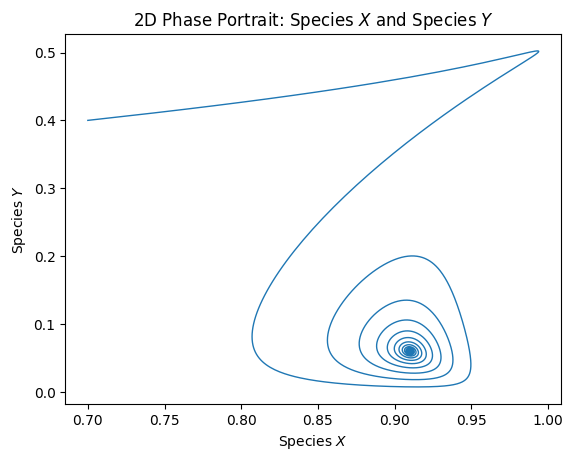

In [29]:
title = f"2D Phase Portrait: {xaxis} and {yaxis}"

filename = "equilibrium-interior-pp-xy"

generate_figures.my_2D_phase_portrait(sol_x, sol_y, title, xaxis, yaxis, 
                                      filename=filename)

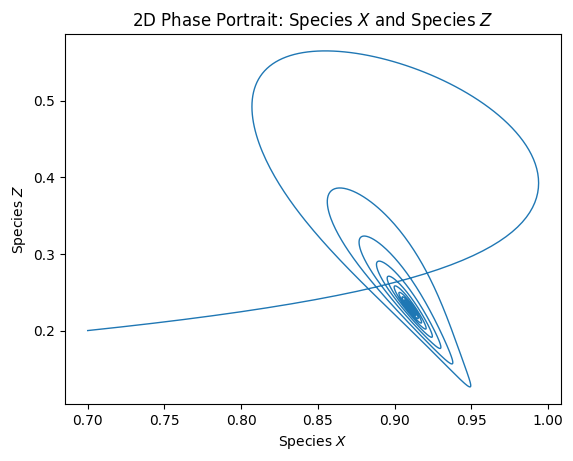

In [30]:
title = f"2D Phase Portrait: {xaxis} and {zaxis}"

filename = "equilibrium-interior-pp-xz"

generate_figures.my_2D_phase_portrait(sol_x, sol_z, title, xaxis, zaxis, 
                                      filename=filename)

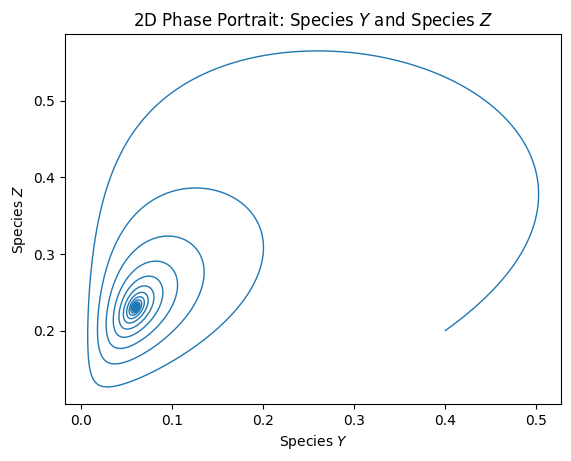

In [31]:
title = f"2D Phase Portrait: {yaxis} and {zaxis}"

filename = "equilibrium-interior-pp-yz"

generate_figures.my_2D_phase_portrait(sol_y, sol_z, title, yaxis, zaxis, 
                                      filename=filename)

### Bifurcation Diagrams for $r_{yx}$

In [32]:
bifurcation_parameter = r_yx
bifurcation_parameter_str = "r_{yx}"
bifurcation_parameter_bounds = [0, 1]
bifurcation_parameter_values = list(params_dict_2.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.5
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)
title = "Time Evolution of Each Species"
xaxis = "Time in Days"
yaxis = "Population Density"

c:\Users\rayla\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $r_{zx}$

In [ ]:
bifurcation_parameter = r_zx
bifurcation_parameter_str = "r_{zx}"
bifurcation_parameter_bounds = [0.133, 0.6155]
bifurcation_parameter_values = list(params_dict.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.35
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $p$

In [ ]:
bifurcation_parameter = p
bifurcation_parameter_str = "p"
bifurcation_parameter_bounds = [0, 0.9476]
bifurcation_parameter_values = list(params_dict.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.1
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $\varphi_{xy}$

In [ ]:
bifurcation_parameter = phi_xy
bifurcation_parameter_str = "\\varphi_{xy}"
bifurcation_parameter_bounds = [0, 0.9476]
bifurcation_parameter_values = list(params_dict_2.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.15
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $\varphi_{yx}$

In [ ]:
bifurcation_parameter = phi_yx
bifurcation_parameter_str = "\\varphi_{yx}"
bifurcation_parameter_bounds = [0.0, 0.444]
bifurcation_parameter_values = list(params_dict.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.43
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $\varphi_{xz}$

In [ ]:
bifurcation_parameter = phi_xz
bifurcation_parameter_str = "\\varphi_{xz}"
bifurcation_parameter_bounds = [0, 2.252]
bifurcation_parameter_values = list(params_dict_2.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.5
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $u_1$

In [ ]:
bifurcation_parameter = u_1
bifurcation_parameter_str = "u_1"
bifurcation_parameter_bounds = [0.0, 1.0]
bifurcation_parameter_values = list(params_dict_2.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.8
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $u_2$

In [ ]:
bifurcation_parameter = u_2
bifurcation_parameter_str = "u_2"
bifurcation_parameter_bounds = [0.0354, 0.1]
bifurcation_parameter_values = list(params_dict.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.04
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $u_3$

In [ ]:
bifurcation_parameter = u_3
bifurcation_parameter_str = "u_3"
bifurcation_parameter_bounds = [0.208, 3]
bifurcation_parameter_values = list(params_dict_2.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.75
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)

### Bifurcation Diagrams for $u_4$

In [ ]:
bifurcation_parameter = u_4
bifurcation_parameter_str = "u_4"
bifurcation_parameter_bounds = [0.078, 0.55]
bifurcation_parameter_values = list(params_dict_2.values())
bifurcation_parameter_values[
    list(params_symb).index(bifurcation_parameter)] = 0.3
data = compute_data.get_bifurcation_data(model, vars_dict, params_symb,
                                         t_max_b, bifurcation_parameter,
                                         bifurcation_parameter_bounds,
                                         bifurcation_parameter_values)
params_dict_temp = dict(zip(params_symb, bifurcation_parameter_values))
ts, sol = compute_data.solve_model(model, vars_dict, params_dict_temp, t_max)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}"

generate_figures.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, 
                         filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-x"

generate_figures.my_bifurcation_diagram(data[1], data[2], X, 
                                        bifurcation_parameter_str, "black", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-y"

generate_figures.my_bifurcation_diagram(data[4], data[5], Y, 
                                        bifurcation_parameter_str, "red", 
                                        filename=filename)

In [ ]:
filename = f"equilibrium-interior-bifurcation-{bifurcation_parameter}-z"

generate_figures.my_bifurcation_diagram(data[7], data[8], Z, 
                                        bifurcation_parameter_str, "blue", 
                                        filename=filename)